# Classification with classic Machine Learning

### Load training and evaluation sets

In [9]:
from pathlib import Path
import pickle
import numpy as np

base_dir = "./features/"

load_file = f"{base_dir}X_train.pkl"
with open(load_file, "rb") as load_file:
    X = pickle.load(load_file)
    
load_file = f"{base_dir}y_train.pkl"
with open(load_file, "rb") as load_file:
    y = pickle.load(load_file)
    
load_file = f"{base_dir}X_val.pkl"
with open(load_file, "rb") as load_file:
    X_val = pickle.load(load_file)
    
load_file = f"{base_dir}y_val.pkl"
with open(load_file, "rb") as load_file:
    y_val = pickle.load(load_file)
    
load_file = f"{base_dir}X_unbal.pkl"
with open(load_file, "rb") as load_file:
    X_unbal = pickle.load(load_file)
    
load_file = f"{base_dir}y_unbal.pkl"
with open(load_file, "rb") as load_file:
    y_unbal = pickle.load(load_file)

### Load labels

In [10]:
load_file = f"{base_dir}multiLabelBinarizer.pkl"
with open(load_file, "rb") as load_file:
    mlb = pickle.load(load_file)

### Data augmentation
Add unbalanced data to have more records available

In [11]:
import numpy as np

np.concatenate((X, X_unbal))
np.concatenate((y, y_unbal))

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Test different models

### Reduce dimensions for testing
y truth must have only 1D and dataset 2D

In [12]:
y_red = np.array([a.argmax() for a in y]) # red for reduced!
y_val_red = np.array([y.argmax() for y in y_val])

nsamples, nx, ny = X.shape
X_red = X.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_val.shape
X_val_red = X_val.reshape((nsamples,nx*ny))

### Let's try some of the most used models

In [18]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import ComplementNB # Dice que es bueno para sets no balanceados
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier # Especiales multiclass
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.model_selection import StratifiedKFold
import statistics

# Ya que los datos no están bien balanceados, vamos a probar con un StratifiedKFold (aunque ya tengamos un 1.0)
models = {'SGDClassifier': SGDClassifier(), 'SGDCStandarized': Pipeline([('standarize', StandardScaler()), 
            ('sgd', SGDClassifier())]),'LogisticRegression': LogisticRegression(max_iter=1000), 'LrStandarized': Pipeline([('standarize', StandardScaler()), 
            ('lr', LogisticRegression(max_iter=5000))]),'RandomForestClassifier': RandomForestClassifier(), 'ComplementNB': ComplementNB(), 
            'DecisionTreeClassifier': DecisionTreeClassifier(), 'HistGradientBoostingClassifier': HistGradientBoostingClassifier(),
            'SVC': SVC(), 'LinearSVC': LinearSVC(max_iter=10000)
        }

for model_tag, model in models.items():
    print(f"************{model_tag}************")
    skf = StratifiedKFold(n_splits=5)
    accuracy_mean = []

    for train_index, test_index in skf.split(X_red, y_red):
        X_train, X_test = X_red[train_index], X_red[test_index]
        y_train, y_test = y_red[train_index], y_red[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracy_mean.append(accuracy)
        bal_accuracy = balanced_accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")
        
        print(f"Acc: {accuracy}, Bal_acc: {bal_accuracy}, Prec: {precision}, Recall: {recall}, F1: {f1}")
        print("-------------------------------------------")
    print(f"Accuracy mean = {statistics.mean(accuracy_mean)}")

************SGDClassifier************
Acc: 0.704225352112676, Bal_acc: 0.6437148031839567, Prec: 0.7312675951214077, Recall: 0.704225352112676, F1: 0.7063662232668263
-------------------------------------------
Acc: 0.7276995305164319, Bal_acc: 0.6982036482036482, Prec: 0.7396558462200334, Recall: 0.7276995305164319, F1: 0.7304813723313952
-------------------------------------------
Acc: 0.7652582159624414, Bal_acc: 0.7124597258313183, Prec: 0.7599933627607097, Recall: 0.7652582159624414, F1: 0.7545606799977853
-------------------------------------------
Acc: 0.7417840375586855, Bal_acc: 0.7071403900313513, Prec: 0.7488609486720891, Recall: 0.7417840375586855, F1: 0.7409381200306205
-------------------------------------------
Acc: 0.7652582159624414, Bal_acc: 0.7153647909028111, Prec: 0.7746563295859069, Recall: 0.7652582159624414, F1: 0.7635824957228896
-------------------------------------------
Accuracy mean = 0.7408450704225352
************SGDCStandarized************
Acc: 0.6854460

Acc: 0.7230046948356808, Bal_acc: 0.6111708911206759, Prec: 0.6993278972078083, Recall: 0.7230046948356808, F1: 0.6925356333807038
-------------------------------------------
Accuracy mean = 0.7342723004694836
************LinearSVC************
Acc: 0.7136150234741784, Bal_acc: 0.6709730569127986, Prec: 0.7204069152615269, Recall: 0.7136150234741784, F1: 0.7156830708592191
-------------------------------------------
Acc: 0.7183098591549296, Bal_acc: 0.6840261590261589, Prec: 0.7103415843079632, Recall: 0.7183098591549296, F1: 0.7127374324623472
-------------------------------------------
Acc: 0.7605633802816901, Bal_acc: 0.72968926100203, Prec: 0.7559903906734893, Recall: 0.7605633802816901, F1: 0.7560722381946401
-------------------------------------------
Acc: 0.7323943661971831, Bal_acc: 0.7022623412508635, Prec: 0.7331453366664634, Recall: 0.7323943661971831, F1: 0.7264183405883466
-------------------------------------------
Acc: 0.7230046948356808, Bal_acc: 0.6463441203039482, Prec

### Try OneVSRest techniques
using the best models

In [22]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

models = {'SGDClassifier': SGDClassifier(), 'SGDCStandarized': Pipeline([('standarize', StandardScaler()), 
            ('sgd', SGDClassifier())]), 'LogisticRegression':LogisticRegression(max_iter=5000),
          'LrStandarized': Pipeline([('standarize', StandardScaler()), 
            ('lr', LogisticRegression(max_iter=5000))]), 'SVC': SVC(max_iter=10000)
        }

for model_tag, model in models.items():
    print(f"************{model_tag}************")
    skf = StratifiedKFold(n_splits=5)    
    accuracy_mean = []
    
    for train_index, test_index in skf.split(X_red, y_red):
        X_train, X_test = X_red[train_index], X_red[test_index]        
        y_train, y_test = y_red[train_index], y_red[test_index]
        
        ovrc = OneVsRestClassifier(model).fit(X_train, y_train)        
        y_pred = ovrc.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracy_mean.append(accuracy)
        bal_accuracy = balanced_accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")
        
        print(f"Acc: {accuracy}, Bal_acc: {bal_accuracy}, Prec: {precision}, Recall: {recall}, F1: {f1}")
        print("-------------------------------------------")
    print(f"Accuracy mean = {statistics.mean(accuracy_mean)}")

************SGDClassifier************
Acc: 0.7183098591549296, Bal_acc: 0.6564235687262947, Prec: 0.7367059863998014, Recall: 0.7183098591549296, F1: 0.715343484060408
-------------------------------------------
Acc: 0.7417840375586855, Bal_acc: 0.6935619935619937, Prec: 0.7388853509509334, Recall: 0.7417840375586855, F1: 0.7362610711722033
-------------------------------------------
Acc: 0.784037558685446, Bal_acc: 0.7497708460836151, Prec: 0.784399169460602, Recall: 0.784037558685446, F1: 0.7782403870639164
-------------------------------------------
Acc: 0.755868544600939, Bal_acc: 0.7391240235931771, Prec: 0.7630081310293733, Recall: 0.755868544600939, F1: 0.7574633572184092
-------------------------------------------
Acc: 0.7511737089201878, Bal_acc: 0.6979355970030289, Prec: 0.7492991440390478, Recall: 0.7511737089201878, F1: 0.7434908609779832
-------------------------------------------
Accuracy mean = 0.7502347417840376
************SGDCStandarized************
Acc: 0.69014084507

In [7]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=1, 
                               max_features='sqrt', max_depth=None, bootstrap=False)

skf = StratifiedKFold(n_splits=5)    
    
for train_index, test_index in skf.split(X, y_red):
    X_train, X_test = X[train_index], X[test_index]        
    y_train, y_test = y_red[train_index], y_red[test_index]
      
    #ovrc = OneVsRestClassifier(model).fit(X_train, y_train)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    bal_accuracy = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
        
    print(f"Acc: {accuracy}, Bal_acc: {bal_accuracy}, Prec: {precision}, Recall: {recall}, F1: {f1}")

Acc: 0.6350467289719626, Bal_acc: 0.5568489420464032, Prec: 0.6302391324628442, Recall: 0.6350467289719626, F1: 0.617750679689817
Acc: 0.6308411214953271, Bal_acc: 0.5499028275187472, Prec: 0.6332506733594748, Recall: 0.6308411214953271, F1: 0.6117795514513703
Acc: 0.648901355773726, Bal_acc: 0.5702959488139603, Prec: 0.6597347686370506, Recall: 0.648901355773726, F1: 0.6315333705600262
Acc: 0.6465638148667602, Bal_acc: 0.579677042823108, Prec: 0.6569017797598655, Recall: 0.6465638148667602, F1: 0.6284655048281669
Acc: 0.6432912575970079, Bal_acc: 0.5550280071217134, Prec: 0.6553652955796706, Recall: 0.6432912575970079, F1: 0.6238180899118312


## Fine tune hyperparams for SVC

In [27]:
from sklearn.model_selection import GridSearchCV

c_values = [0.1,1, 10, 100]
gamma = [1,0.1,0.01,0.001]
kernel = ['rbf', 'poly', 'sigmoid']
class_weight = ['balanced']
class_weight.append(None)

param_grid = {
    'C': c_values, 
    'gamma': gamma,
    'kernel': kernel,
    'class_weight': class_weight
}

model_tunning = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
model_tunning.fit(X_red, y_red)

print(model_tunning.best_score_)
print(model_tunning.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .C=0.1, class_weight=balanced, gamma=1, kernel=poly; total time=   0.2s
[CV] END .C=0.1, class_weight=balanced, gamma=1, kernel=poly; total time=   0.2s
[CV] END .C=0.1, class_weight=balanced, gamma=1, kernel=poly; total time=   0.2s
[CV] END .C=0.1, class_weight=balanced, gamma=1, kernel=poly; total time=   0.2s
[CV] END .C=0.1, class_weight=balanced, gamma=1, kernel=poly; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=1, kernel=sigmoid; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=

[CV] END ..C=0.1, class_weight=None, gamma=0.01, kernel=poly; total time=   0.2s
[CV] END C=0.1, class_weight=None, gamma=0.01, kernel=sigmoid; total time=   0.2s
[CV] END C=0.1, class_weight=None, gamma=0.01, kernel=sigmoid; total time=   0.3s
[CV] END C=0.1, class_weight=None, gamma=0.01, kernel=sigmoid; total time=   0.2s
[CV] END C=0.1, class_weight=None, gamma=0.01, kernel=sigmoid; total time=   0.3s
[CV] END C=0.1, class_weight=None, gamma=0.01, kernel=sigmoid; total time=   0.3s
[CV] END ..C=0.1, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.6s
[CV] END ..C=0.1, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.6s
[CV] END ..C=0.1, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.6s
[CV] END ..C=0.1, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.6s
[CV] END ..C=0.1, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.6s
[CV] END .C=0.1, class_weight=None, gamma=0.001, kernel=poly; total time=   0.2s
[CV] END .C=0.1, class_

[CV] END .....C=1, class_weight=None, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END .....C=1, class_weight=None, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END .....C=1, class_weight=None, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END .....C=1, class_weight=None, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END .....C=1, class_weight=None, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END ..C=1, class_weight=None, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END ..C=1, class_weight=None, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END ..C=1, class_weight=None, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END ..C=1, class_weight=None, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END ..C=1, class_weight=None, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END .....C=1, class_weight=None, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END .....C=1, class_weight=None, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END .....C=1, class_wei

[CV] END .......C=10, class_weight=None, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .......C=10, class_weight=None, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .......C=10, class_weight=None, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .......C=10, class_weight=None, gamma=1, kernel=rbf; total time=   0.6s
[CV] END ......C=10, class_weight=None, gamma=1, kernel=poly; total time=   0.2s
[CV] END ......C=10, class_weight=None, gamma=1, kernel=poly; total time=   0.2s
[CV] END ......C=10, class_weight=None, gamma=1, kernel=poly; total time=   0.2s
[CV] END ......C=10, class_weight=None, gamma=1, kernel=poly; total time=   0.2s
[CV] END ......C=10, class_weight=None, gamma=1, kernel=poly; total time=   0.2s
[CV] END ...C=10, class_weight=None, gamma=1, kernel=sigmoid; total time=   0.2s
[CV] END ...C=10, class_weight=None, gamma=1, kernel=sigmoid; total time=   0.2s
[CV] END ...C=10, class_weight=None, gamma=1, kernel=sigmoid; total time=   0.2s
[CV] END ...C=10, class_weig

[CV] END C=100, class_weight=balanced, gamma=0.01, kernel=sigmoid; total time=   0.4s
[CV] END C=100, class_weight=balanced, gamma=0.01, kernel=sigmoid; total time=   0.4s
[CV] END C=100, class_weight=balanced, gamma=0.01, kernel=sigmoid; total time=   0.4s
[CV] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.6s
[CV] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.6s
[CV] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.6s
[CV] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.6s
[CV] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.6s
[CV] END C=100, class_weight=balanced, gamma=0.001, kernel=poly; total time=   0.2s
[CV] END C=100, class_weight=balanced, gamma=0.001, kernel=poly; total time=   0.2s
[CV] END C=100, class_weight=balanced, gamma=0.001, kernel=poly; total time=   0.2s
[CV] END C=100, class_weight=balanced, gamma=0.001, kernel=poly; total time

### Load test results

In [28]:
import pandas as pd
df = pd.DataFrame(model_tunning.cv_results_)

In [29]:
df.sort_values(by=['rank_test_score'],axis=0).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
73,0.269554,0.014500,0.051537,0.003885,100,balanced,1,poly,"{'C': 100, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'poly'}",0.741784,0.751174,0.802817,0.755869,0.765258,0.76338,0.021122,1
34,0.261927,0.007939,0.048907,0.002863,1,balanced,0.001,poly,"{'C': 1, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'poly'}",0.741784,0.751174,0.802817,0.755869,0.765258,0.76338,0.021122,1
64,0.264202,0.007600,0.050275,0.002543,10,None,0.1,poly,"{'C': 10, 'class_weight': None, 'gamma': 0.1, 'kernel': 'poly'}",0.741784,0.751174,0.802817,0.755869,0.765258,0.76338,0.021122,1
31,0.264507,0.015264,0.055284,0.009069,1,balanced,0.01,poly,"{'C': 1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'poly'}",0.741784,0.751174,0.802817,0.755869,0.765258,0.76338,0.021122,1
70,0.266882,0.011012,0.052133,0.009005,10,None,0.001,poly,"{'C': 10, 'class_weight': None, 'gamma': 0.001, 'kernel': 'poly'}",0.741784,0.751174,0.802817,0.755869,0.765258,0.76338,0.021122,1


In [31]:
model = SVC(C=0.1, class_weight='balanced', gamma=1, kernel='poly')

model.fit(X_red,y_red)
y_pred = model.predict(X_val_red)

accuracy = accuracy_score(y_val_red, y_pred)
bal_accuracy = balanced_accuracy_score(y_val_red, y_pred)
precision = precision_score(y_val_red, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_val_red, y_pred, average="weighted")
f1 = f1_score(y_val_red, y_pred, average="weighted")
        
print(f"Acc: {accuracy}, Bal_acc: {bal_accuracy}, Prec: {precision}, Recall: {recall}, F1: {f1}")

Acc: 0.716572504708098, Bal_acc: 0.6620549544771157, Prec: 0.7322406107178326, Recall: 0.716572504708098, F1: 0.7139845221088752


### Confusion matrix

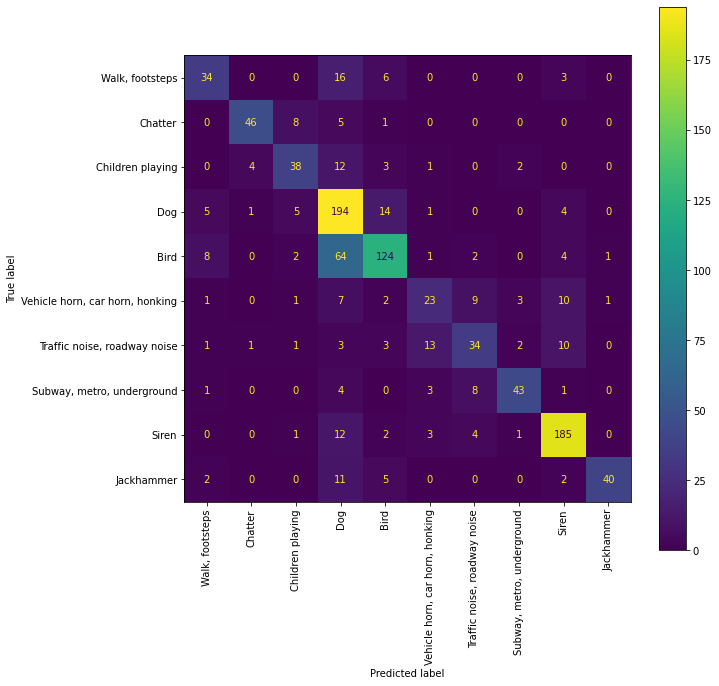

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle

#Load classes names
with open("./features/classes_dict.pkl", "rb") as classes_file:
    classes_dict = pickle.load(classes_file)


fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay.from_predictions(y_val_red, y_pred, display_labels=[classes_dict.get(n) for n in mlb.classes_], 
                              xticks_rotation='vertical', ax=ax)

## Save model

In [48]:
import pickle

# Save model for our project (Accuracy 0.716)
base_dir = "./models/"

dump_filename = f"{base_dir}SVC.pkl"
with open(dump_filename, "wb") as dump_file:
    pickle.dump(mlb, dump_file)